In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# importando o dataset 

Text(0, 0.5, 'color_intensity')

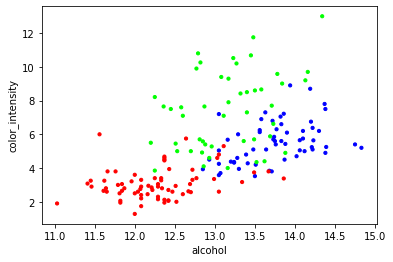

In [2]:
from sklearn import datasets

## selecionando apenas 2 caracteristicas (X) para exemplificar
features = [0, 9]

wine = datasets.load_wine()

data = wine.data[:, features]
target = wine.target

plt.scatter(data[:, 0], data[:, 1], c=target, s=10, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

# normalizando os dados

Text(0, 0.5, 'color_intensity')

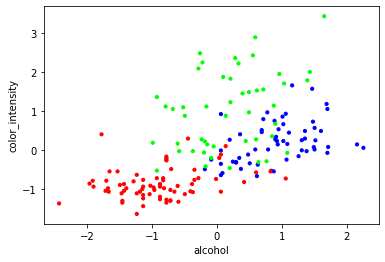

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=target, s=10, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

# instanciando a rede

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


In [5]:
input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names) #numero de classes

## criando a NN, atraves do sequential(tanto faz sequential/module)

In [6]:
net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)
                    

net = net.to(device)

## plotando o modelo

In [7]:
def plot_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
    spacing = min(x_max - x_min, y_max - y_min) / 100
  
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
    data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
#   # For binary problems
#   db_prob = model(Variable(torch.Tensor(data)).cuda() )
#   clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
    # For multi-class problems
    db_prob = model(torch.Tensor(data).to(device) )
    clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
    Z = clf.reshape(XX.shape)
  
    plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

C:\Users\Elvis\anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


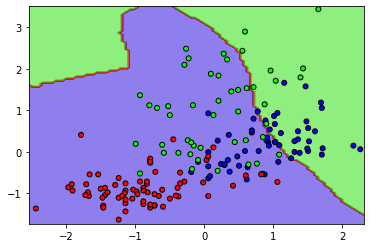

In [8]:
plot_boundary(data, target, net)

## otimizando 

In [9]:
from torch import optim

# função de perda
criterion = nn.CrossEntropyLoss().to(device)


#otimizador: Descida do gradiante
# Stochastic gradiant descent

optimizer = optim.SGD(net.parameters(), lr=1e-3)   #otimizador, passar os parametros e definir a taxa de aprendizagem(lr)



#custo

# transformando os dados para tensores e subindo para GPU

In [10]:
X = torch.FloatTensor(data).to(device)  #GPU
Y = torch.LongTensor(target).to(device)  #GPU

# treinamento da rede

### forward e Backward

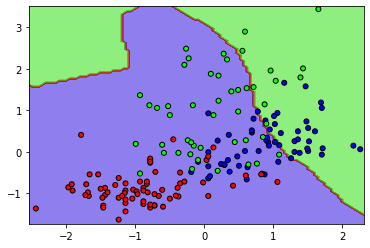

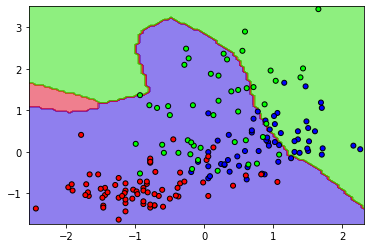

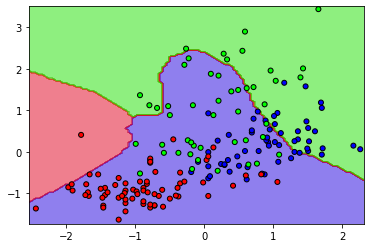

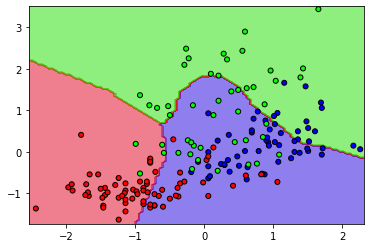

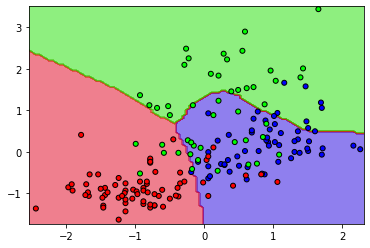

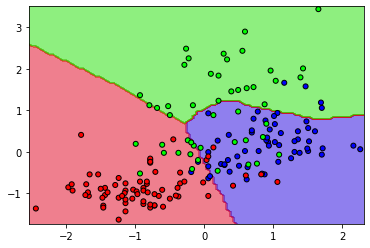

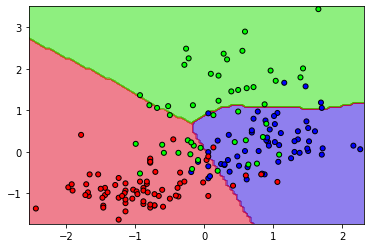

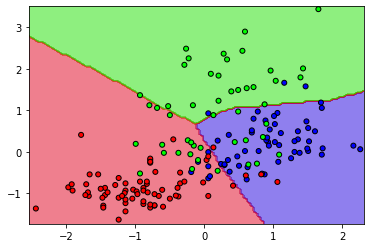

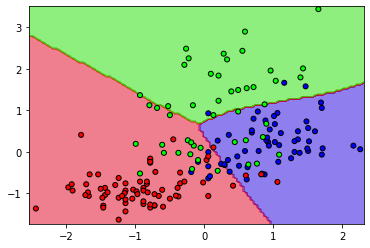

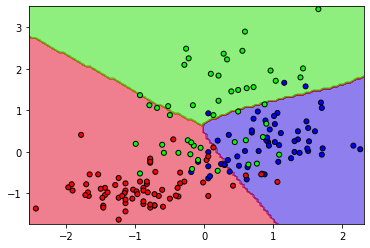

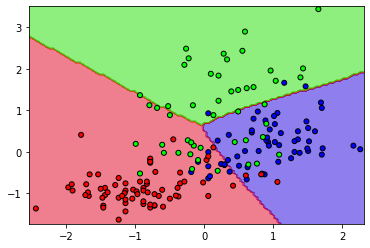

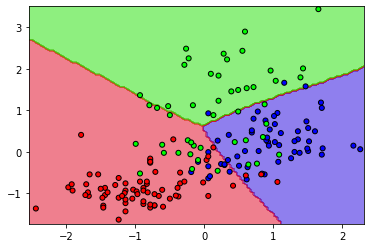

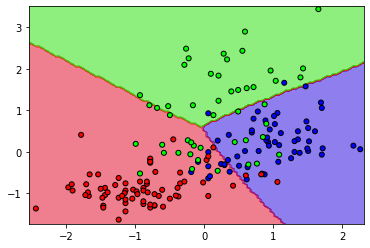

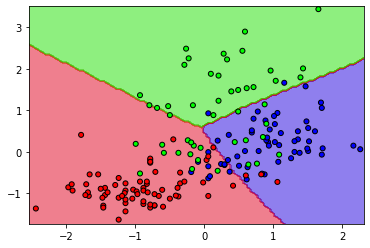

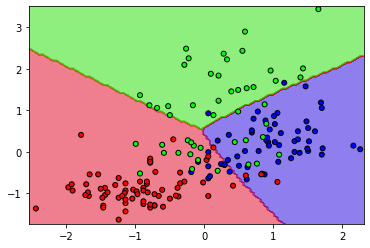

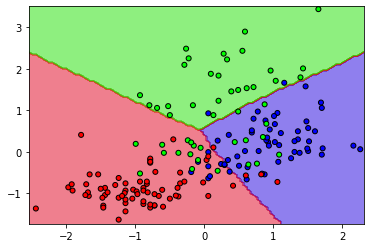

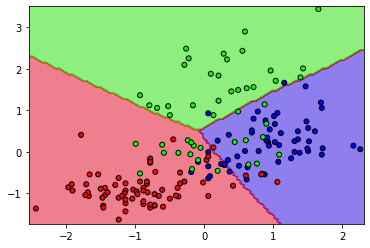

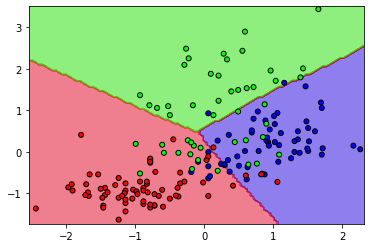

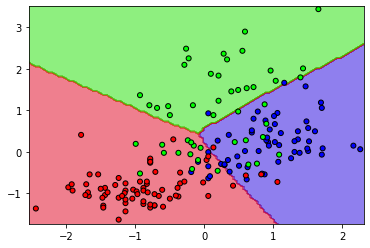

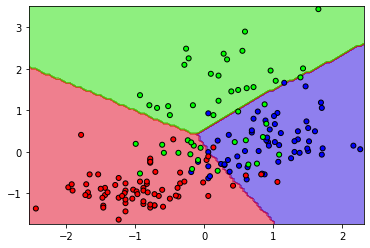

In [11]:
for i in range(200):
    ## Forward
    pred = net(X)
    loss = criterion(pred, Y)

    ##Backward
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.figure()
        plot_boundary(data, target, net)